# Experiment 2 Results

## Import Required Libraries

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import os

# Set plot styling
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

## Load and Preprocess Data

We'll load the data containing model outputs, strategies, and ground truth files, then perform necessary preprocessing.

In [14]:
# Define path to data
# Assuming the data is stored in a CSV file with columns for model, strategy, ground_truth, output, f1_score, etc.
# Adjust the path as needed
data_path = Path('experiment-2-raw/evaluation_results.csv')

# Load data
try:
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully with {len(df)} rows")
    print(f"Columns: {df.columns.tolist()}")
    df.head()
    #rename the fine-tuned model
    df['model'] = df['model'].replace({'ft:gpt-4o-mini-2024-07-18:pd-berater-der-ffentlichen-hand:polianna-turtle:BOPrF1gr': 'gpt-4o-mini-ft'})

except FileNotFoundError:
    print("Data file not found. Please update the path.")
    # Create sample data for demonstration
    print("Creating sample data for demonstration...")
    
    # Sample models, strategies, and files
    models = ['GPT-4', 'Claude-3', 'Llama-3', 'Mistral']
    strategies = ['Direct-to-Turtle', 'Extract-then-Convert', 'Triplet-Based', 'Template-Guided']
    files = [f"policy_{i}" for i in range(1, 21)]
    
    # Generate sample data
    data = []
    np.random.seed(42)
    
    for file in files:
        file_length = np.random.randint(10, 100)  # simulated file length in triplets
        file_text_length = file_length * 30  # approximate text length
        
        for model in models:
            for strategy in strategies:
                # Simulate performance metrics
                precision = np.random.uniform(0.5, 0.95)
                recall = np.random.uniform(0.5, 0.95)
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                valid_turtle = np.random.choice([True, False], p=[0.8, 0.2])
                
                data.append({
                    'model': model,
                    'strategy': strategy,
                    'ground_truth_file': file,
                    'gt_triplet_count': file_length,
                    'gt_text_length': file_text_length,
                    'precision': precision,
                    'recall': recall,
                    'f1_score': f1,
                    'valid_turtle': valid_turtle
                })
    
    df = pd.DataFrame(data)
    print("Sample data created.")
    df.head()

Data loaded successfully with 166 rows
Columns: ['is_valid', 'syntax_errors', 'precision', 'recall', 'f1_score', 'true_positives', 'false_positives', 'false_negatives', 'property_precision', 'property_recall', 'property_f1_score', 'property_true_positives', 'property_false_positives', 'property_false_negatives', 'property_diversity', 'class_precision', 'class_recall', 'class_f1_score', 'class_true_positives', 'class_false_positives', 'class_false_negatives', 'https://polianna-kg.org/Ontology#contains_instrument', 'https://polianna-kg.org/Ontology#contains_objective', 'https://polianna-kg.org/Ontology#contains_monitoring_form', 'https://polianna-kg.org/Ontology#contains_sanctioning_form', 'https://polianna-kg.org/Ontology#addresses', 'entity_precision', 'entity_recall', 'entity_f1_score', 'entity_true_positives', 'entity_false_positives', 'entity_false_negatives', 'ontology_consistency_score', 'constraint_violations', 'constraint_violations_by_type', 'ontology_conforms', 'ground_truth_t

## Compare Recall Score by Model and Strategy

We'll analyze how Recall scores vary across different models and strategies.

In [15]:
recall_by_model_strategy = df.groupby(['model', 'strategy'])['recall'].agg(['mean', 'std', 'count']).reset_index()
recall_by_model_strategy.columns = ['model', 'strategy', 'Mean Recall', 'Std Dev', 'Count']
recall_by_model_strategy = recall_by_model_strategy.sort_values(by='Mean Recall', ascending=False)

recall_by_model_strategy

,model,strategy,Mean Recall,Std Dev,Count
0,gpt-4o-2024-08-06,few-shot,0.330436,0.134457,42
1,gpt-4o-2024-08-06,one-shot,0.313995,0.136847,42
2,gpt-4o-2024-08-06,zero-shot,0.163698,0.092798,42
3,qwen2.5-coder:32b,one-shot,0.000000,0.000000,24
4,qwen2.5-coder:32b,zero-shot,0.000000,0.000000,14


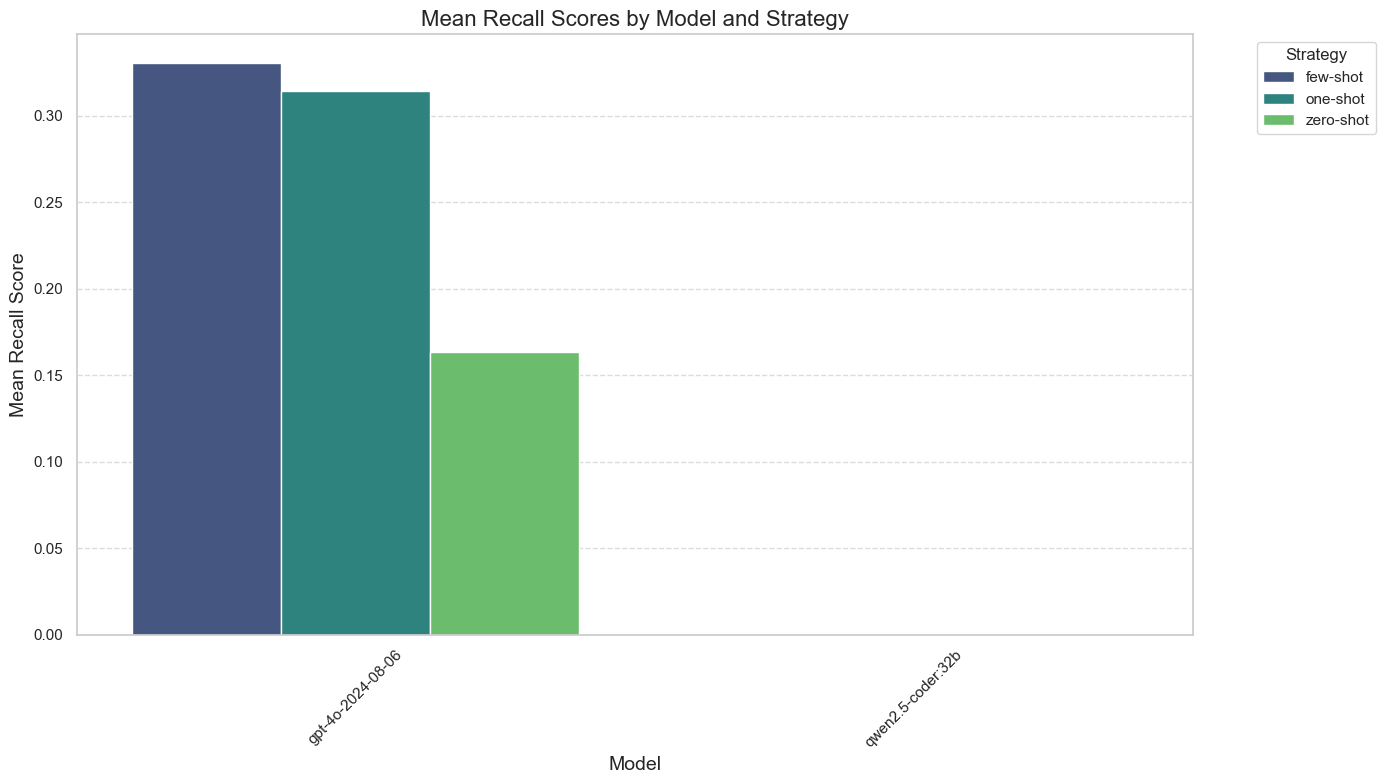

In [16]:
# Create a grouped bar chart of Recall scores by model and strategy
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='Mean Recall', hue='strategy', data=recall_by_model_strategy, palette='viridis')
plt.title('Mean Recall Scores by Model and Strategy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Recall Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Compare Precision Score by Model and Strategy

We'll analyze how Recall scores vary across different models and strategies.

In [17]:
precision_by_model_strategy = df.groupby(['model', 'strategy'])['precision'].agg(['mean', 'std', 'count']).reset_index()
precision_by_model_strategy.columns = ['model', 'strategy', 'Mean Precision', 'Std Dev', 'Count']
precision_by_model_strategy = precision_by_model_strategy.sort_values(by='Mean Precision', ascending=False)

precision_by_model_strategy

,model,strategy,Mean Precision,Std Dev,Count
0,gpt-4o-2024-08-06,few-shot,0.565791,0.149098,42
1,gpt-4o-2024-08-06,one-shot,0.546264,0.167677,42
2,gpt-4o-2024-08-06,zero-shot,0.352661,0.164527,42
3,qwen2.5-coder:32b,one-shot,0.000000,0.000000,24
4,qwen2.5-coder:32b,zero-shot,0.000000,0.000000,14


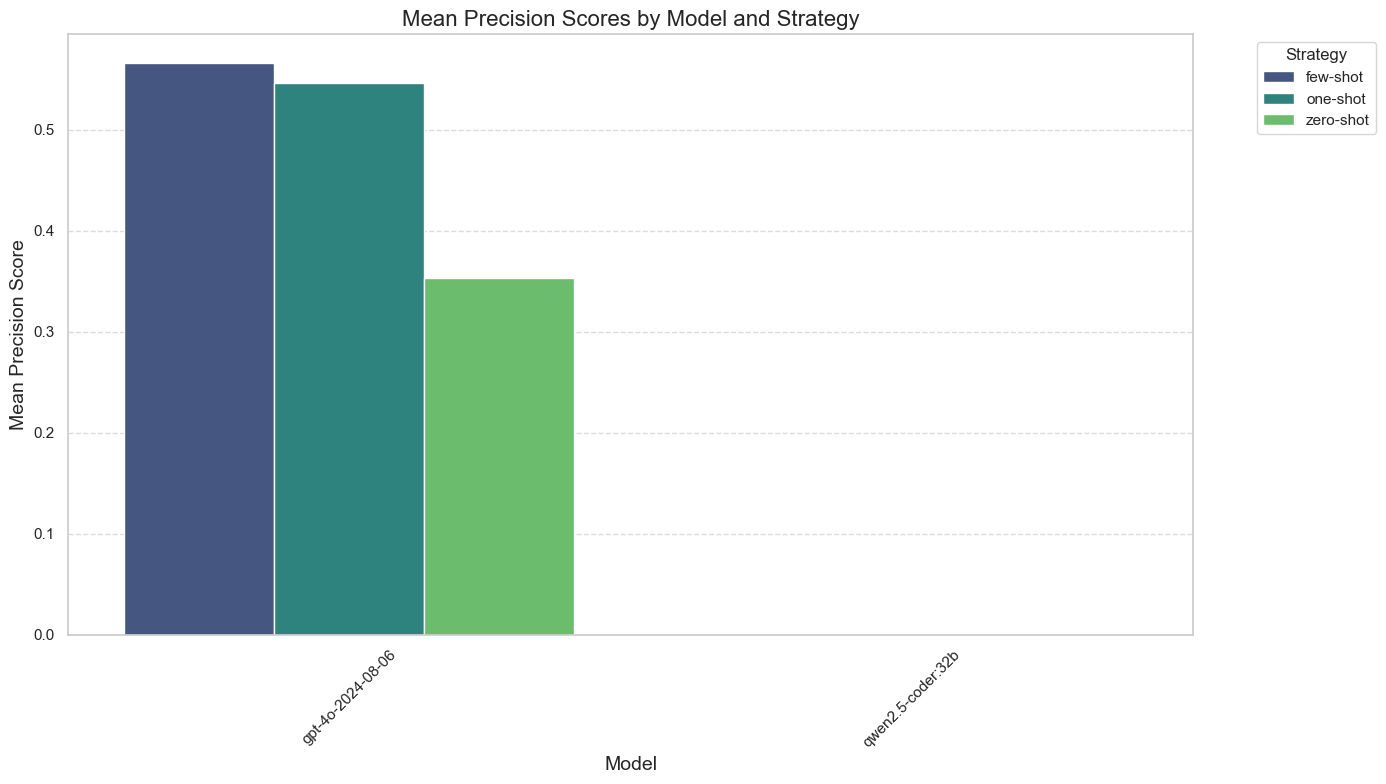

In [18]:
# Create a grouped bar chart of Precision scores by model and strategy
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='Mean Precision', hue='strategy', data=precision_by_model_strategy, palette='viridis')
plt.title('Mean Precision Scores by Model and Strategy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Precision Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Compare F1 Score by Model and Strategy

We'll analyze how F1 scores vary across different models and strategies.

In [19]:
# Calculate mean F1 scores grouped by model and strategy
f1_by_model_strategy = df.groupby(['model', 'strategy'])['f1_score'].agg(['mean', 'std', 'count']).reset_index()
f1_by_model_strategy.columns = ['Model', 'Strategy', 'Mean F1', 'Std Dev', 'Count']
f1_by_model_strategy = f1_by_model_strategy.sort_values('Mean F1', ascending=False)




print("F1 Scores by Model and Strategy:")
f1_by_model_strategy

F1 Scores by Model and Strategy:


,Model,Strategy,Mean F1,Std Dev,Count
0,gpt-4o-2024-08-06,few-shot,0.405576,0.132135,42
1,gpt-4o-2024-08-06,one-shot,0.389793,0.142822,42
2,gpt-4o-2024-08-06,zero-shot,0.218093,0.107818,42
3,qwen2.5-coder:32b,one-shot,0.000000,0.000000,24
4,qwen2.5-coder:32b,zero-shot,0.000000,0.000000,14


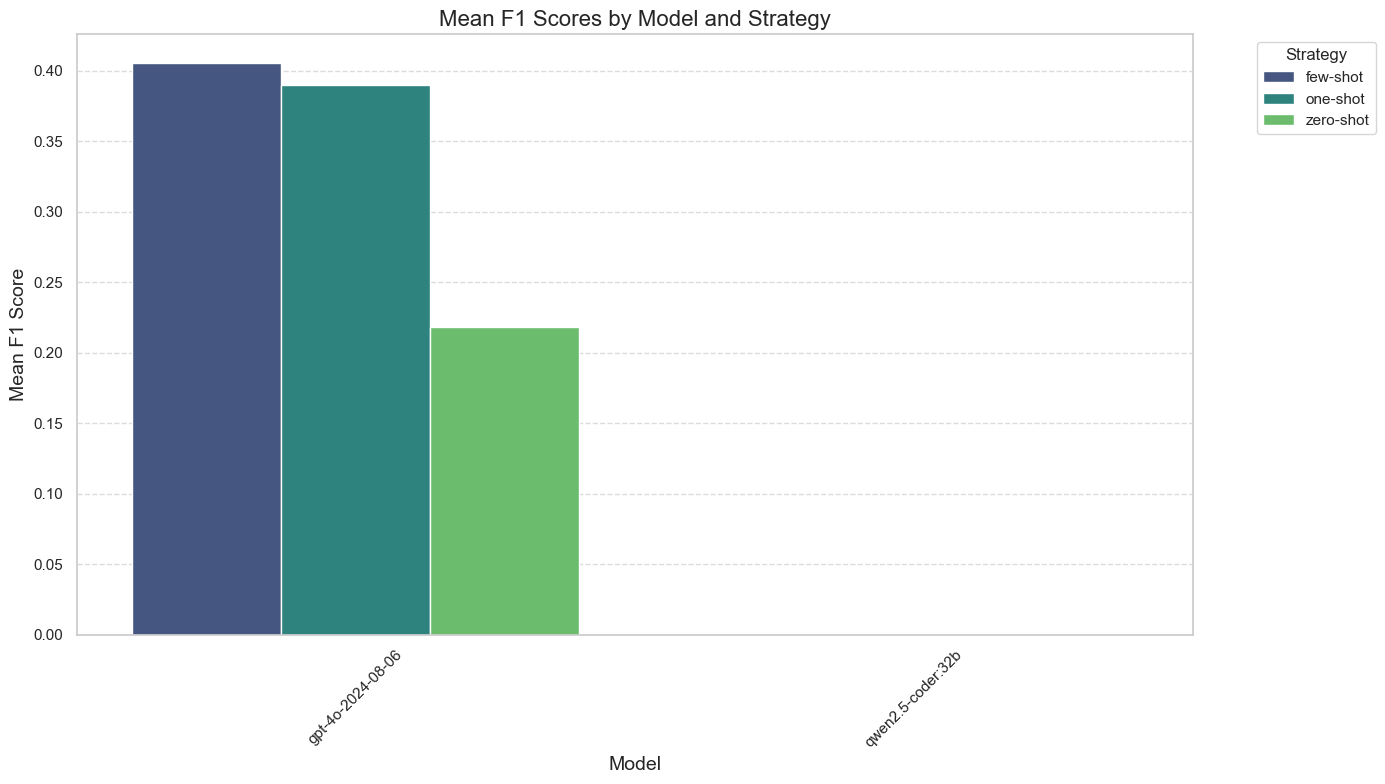

In [20]:
# Create a grouped bar chart of F1 scores by model and strategy
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Mean F1', hue='Strategy', data=f1_by_model_strategy, palette='viridis')
plt.title('Mean F1 Scores by Model and Strategy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean F1 Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

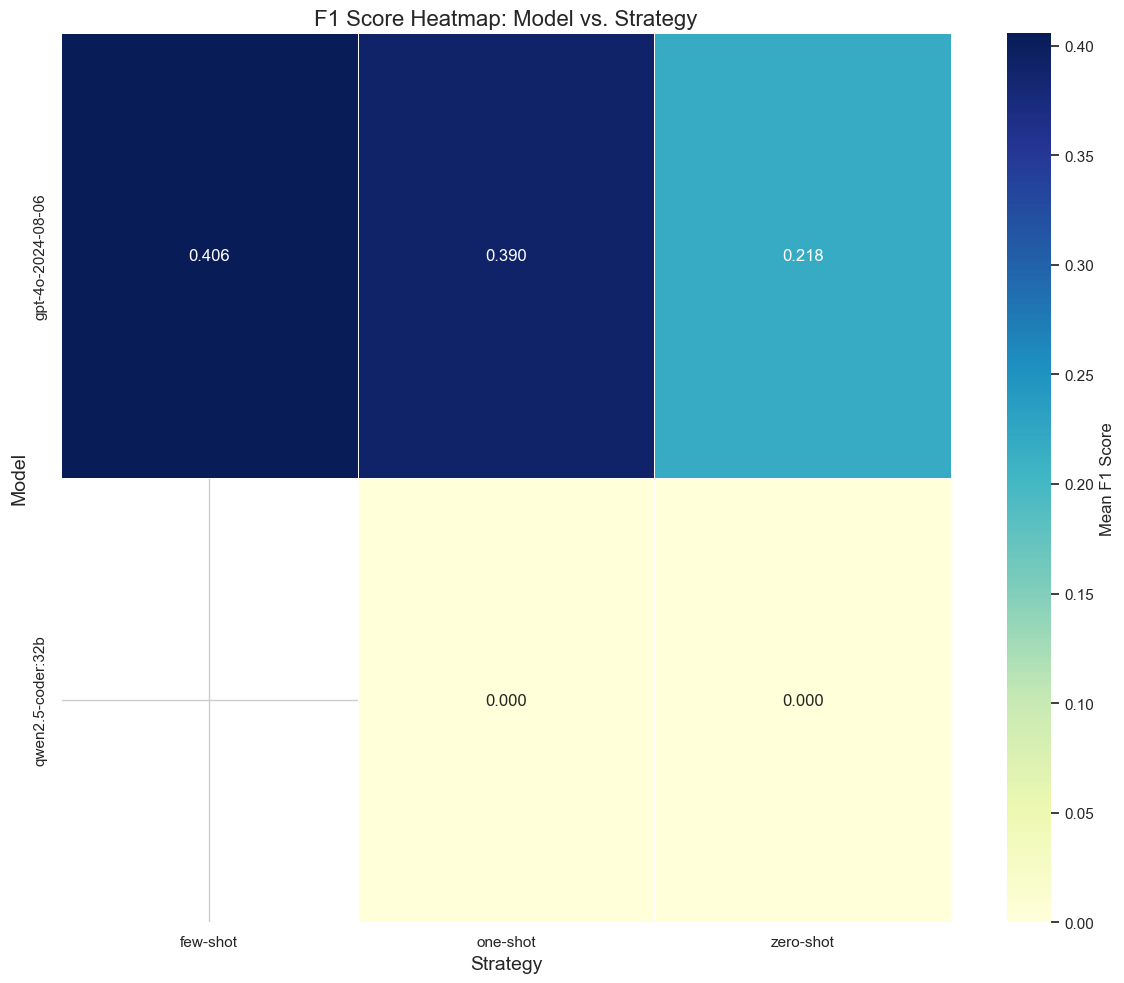

In [21]:
# Create a heatmap to visualize F1 scores
pivot_f1 = df.pivot_table(values='f1_score', index='model', columns='strategy', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_f1, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=.5, cbar_kws={'label': 'Mean F1 Score'})
plt.title('F1 Score Heatmap: Model vs. Strategy', fontsize=16)
plt.xlabel('Strategy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.tight_layout()
plt.show()

## Count Valid Turtles Generated Across Strategies

Let's analyze how many valid Turtle files each model and strategy combination produced.

In [22]:
# Count valid Turtle files by model and strategy
valid_turtles = df.groupby(['model', 'strategy'])['is_valid'].agg(['sum', 'count']).reset_index()
valid_turtles['percentage'] = (valid_turtles['sum'] / valid_turtles['count'] * 100).round(2)
valid_turtles.columns = ['Model', 'Strategy', 'Valid Turtles', 'Total Attempts', 'Success Rate (%)']

print("Valid Turtle Generation by Model and Strategy:")
valid_turtles = valid_turtles.sort_values('Success Rate (%)', ascending=False)
valid_turtles

Valid Turtle Generation by Model and Strategy:


,Model,Strategy,Valid Turtles,Total Attempts,Success Rate (%)
0,gpt-4o-2024-08-06,few-shot,42,42,100.00
1,gpt-4o-2024-08-06,one-shot,42,42,100.00
2,gpt-4o-2024-08-06,zero-shot,42,42,100.00
3,qwen2.5-coder:32b,one-shot,24,25,96.00
4,qwen2.5-coder:32b,zero-shot,14,15,93.33


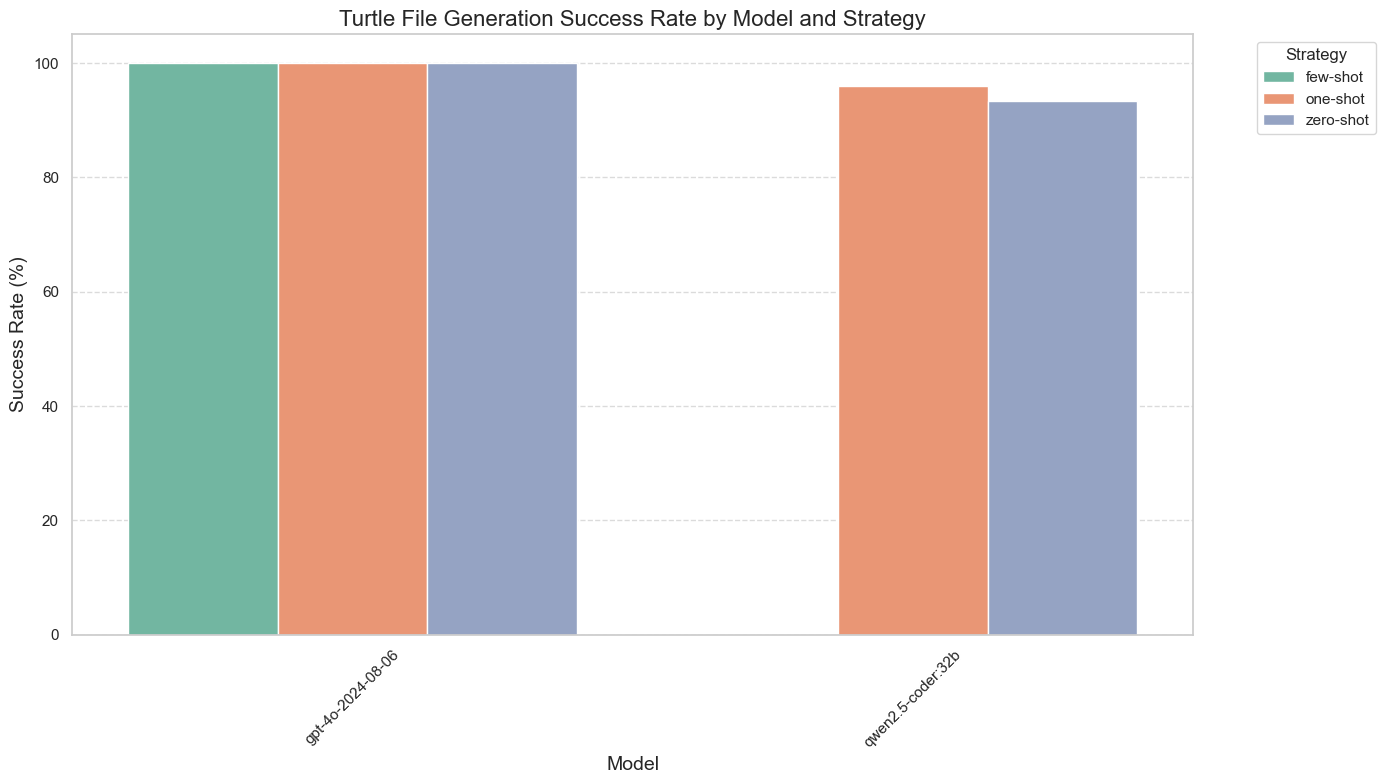

In [23]:
# Create a grouped bar chart for valid turtle percentages
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Success Rate (%)', hue='Strategy', data=valid_turtles, palette='Set2')
plt.title('Turtle File Generation Success Rate by Model and Strategy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Success for Shorter Ground Truth Files

Let's investigate if model performance varies with the length of ground truth files.

<Figure size 1800x1200 with 0 Axes>

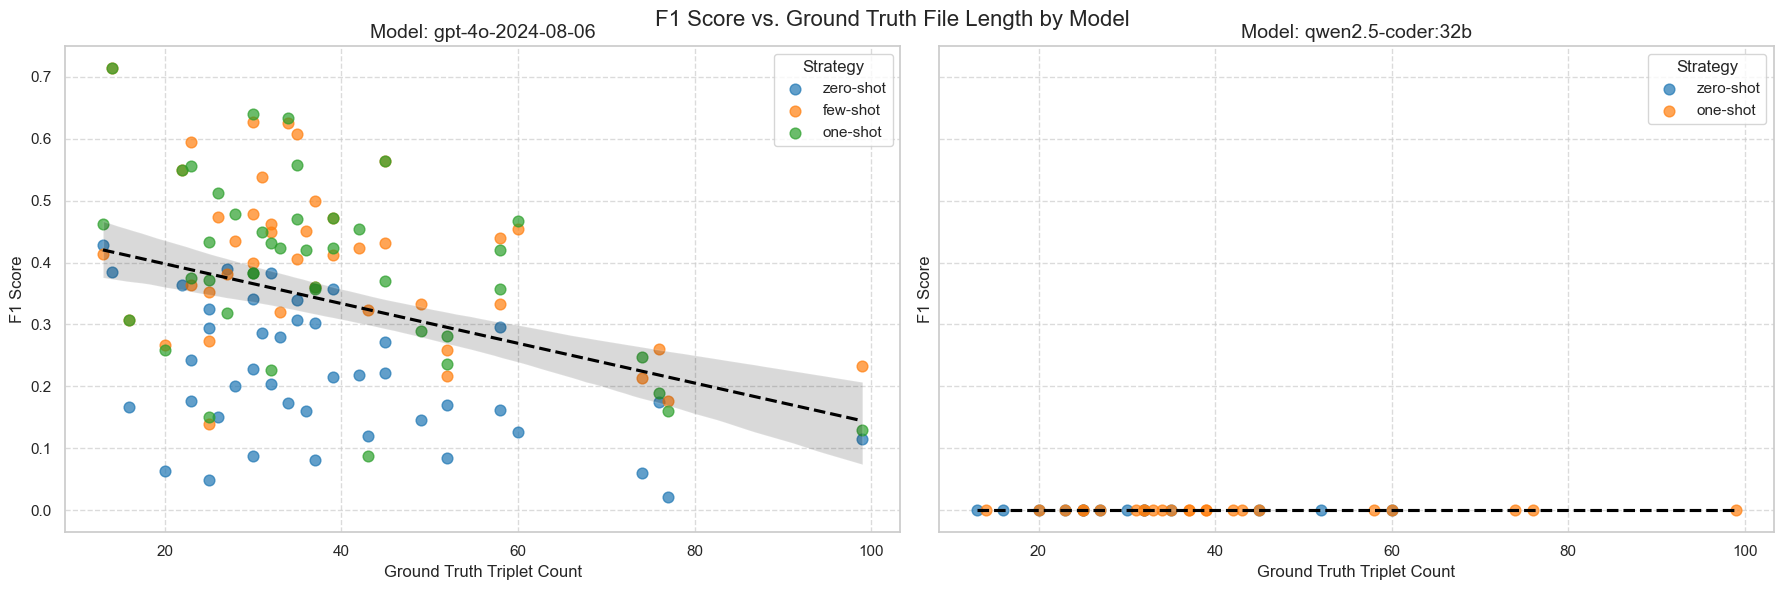

In [24]:
# Create a scatter plot of F1 score vs. file length with regression lines, one subplot per model
plt.figure(figsize=(18, 12))

# Get unique models
models = df['model'].unique()
num_models = len(models)

# Calculate grid dimensions
if num_models <= 2:
    rows, cols = 1, num_models
else:
    rows = (num_models + 1) // 2  # Round up division
    cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows), sharey=True)

# Make axes always a 2D array that we can index properly
axes = np.array(axes).reshape(-1)

# Plot each model in its own subplot
for i, model in enumerate(models):
    ax = axes[i]
    
    # Filter data for this model
    model_data = df[df['model'] == model]
    
    # Plot scatter points for each strategy
    for strategy, color in zip(model_data['strategy'].unique(), 
                              plt.cm.tab10.colors[:len(model_data['strategy'].unique())]):
        strategy_data = model_data[model_data['strategy'] == strategy]
        ax.scatter(strategy_data['ground_truth_triple_count'], strategy_data['f1_score'], 
                   label=strategy, alpha=0.7, s=60, c=[color])
    
    # Add regression line
    sns.regplot(x='ground_truth_triple_count', y='f1_score', data=model_data, 
                scatter=False, color='black', line_kws={'linestyle': '--'}, ax=ax)
    
    ax.set_title(f'Model: {model}', fontsize=14)
    ax.set_xlabel('Ground Truth Triplet Count', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Strategy', loc='upper right')

# Remove any unused subplots
if rows * cols > num_models:
    for j in range(num_models, rows * cols):
        fig.delaxes(axes[j])

plt.suptitle('F1 Score vs. Ground Truth File Length by Model', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()